<a href="https://colab.research.google.com/github/beatricecxx/beatricecxx.github.io/blob/main/FYP_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Prediction**
In this project, we are trying to classify whether a breast cancer tumor is malignant or benign based on Wisconsin dataset from UCI repository. Firstly, we import the required libraries for our project.

In [ ]:
# Data preprocessing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Data** **Understanding**
The purpose of performing data understanding is to gain general insights about the data that will potentially be helpful for the further steps in the data analysis process.



In [ ]:
# Load the Wisconsin dataset into a Pandas DataFrame
df =pd.read_csv ("https://raw.githubusercontent.com/flora0522/fypbreastcancer/main/data.csv")


### **Exploratory Data Analysis (EDA)**

EDA is used to analyze datasets to extract characteristic information and to obtain a bird's eye view on the features of our data. It usually help us to gain insights into the data and identify patterns, trends, relationships, anomalies, and potential issues or challenges that may need to be addressed during the following sections.


In [ ]:
# Summary of Pandas DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Summary numerical statistics for the remaining columns in the DataFrame
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Print the diagnosis's column statistical information
diagnosis_stats =df['diagnosis'].describe()
print(diagnosis_stats)

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object


In [ ]:
# Display the first few rows of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As seen from the dataframe, where row 32th 'Unnamed:32' variables has 0 non null meaning the entire columns has 0 records/empty column, hence this variable will be dropped below.

In [ ]:
# Drop Unnamed: 32 due to blank column
df = df.drop(['Unnamed: 32'], axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Map diagnosis M to 1 and B to 0 from categorical to numerical data as correlation heatmap is a graphical representation of the correlation between numerical variables in a dataset.
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

0    357
1    212
Name: diagnosis, dtype: int64


Balance of target variable:
Benign (B:0): 357
Malignant (M:1): 212


Balance of target variable in %:
Benign (B:0): 62.74%
Malignant (M:1): 37.26%




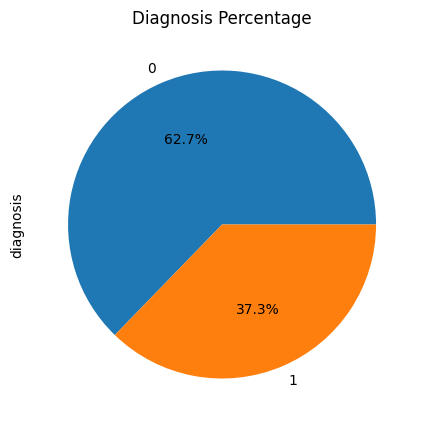

In [ ]:
# Count number of 'diagnosis' values of each class of 0 and 1 to check for imbalance data
class_counts = df['diagnosis'].value_counts()
print (class_counts)

print("\n")
# Print balance of the target variable
print("Balance of target variable:")
# From the above, benign and malignant had been mapped into class 0 and 1, to show the balance of the target variable B and M, below will be showing the counts of Benign and Malignant from class 0 and 1
print("Benign (B:0):", class_counts[0])
print("Malignant (M:1):", class_counts[1])

print("\n")
# Show in percentage
print("Balance of target variable in %:")
total_samples = len(df)
benign_percentage = (class_counts[0] / total_samples) * 100
malignant_percentage = (class_counts[1] / total_samples) * 100
print("Benign (B:0): {:.2f}%".format(benign_percentage))
print("Malignant (M:1): {:.2f}%".format(malignant_percentage))

print("\n")
# Plot the diagnosis in a pie chart with percentage labels
plt.figure(figsize=(5,5))
class_counts.plot.pie(autopct='%.1f%%')
plt.title('Diagnosis Percentage')
plt.show()

Plot Pie Chart above shows the value counts of diagnosis column, where there is a slight imbalance to the values B:0 = 62.7% and M:1 = 37.3%

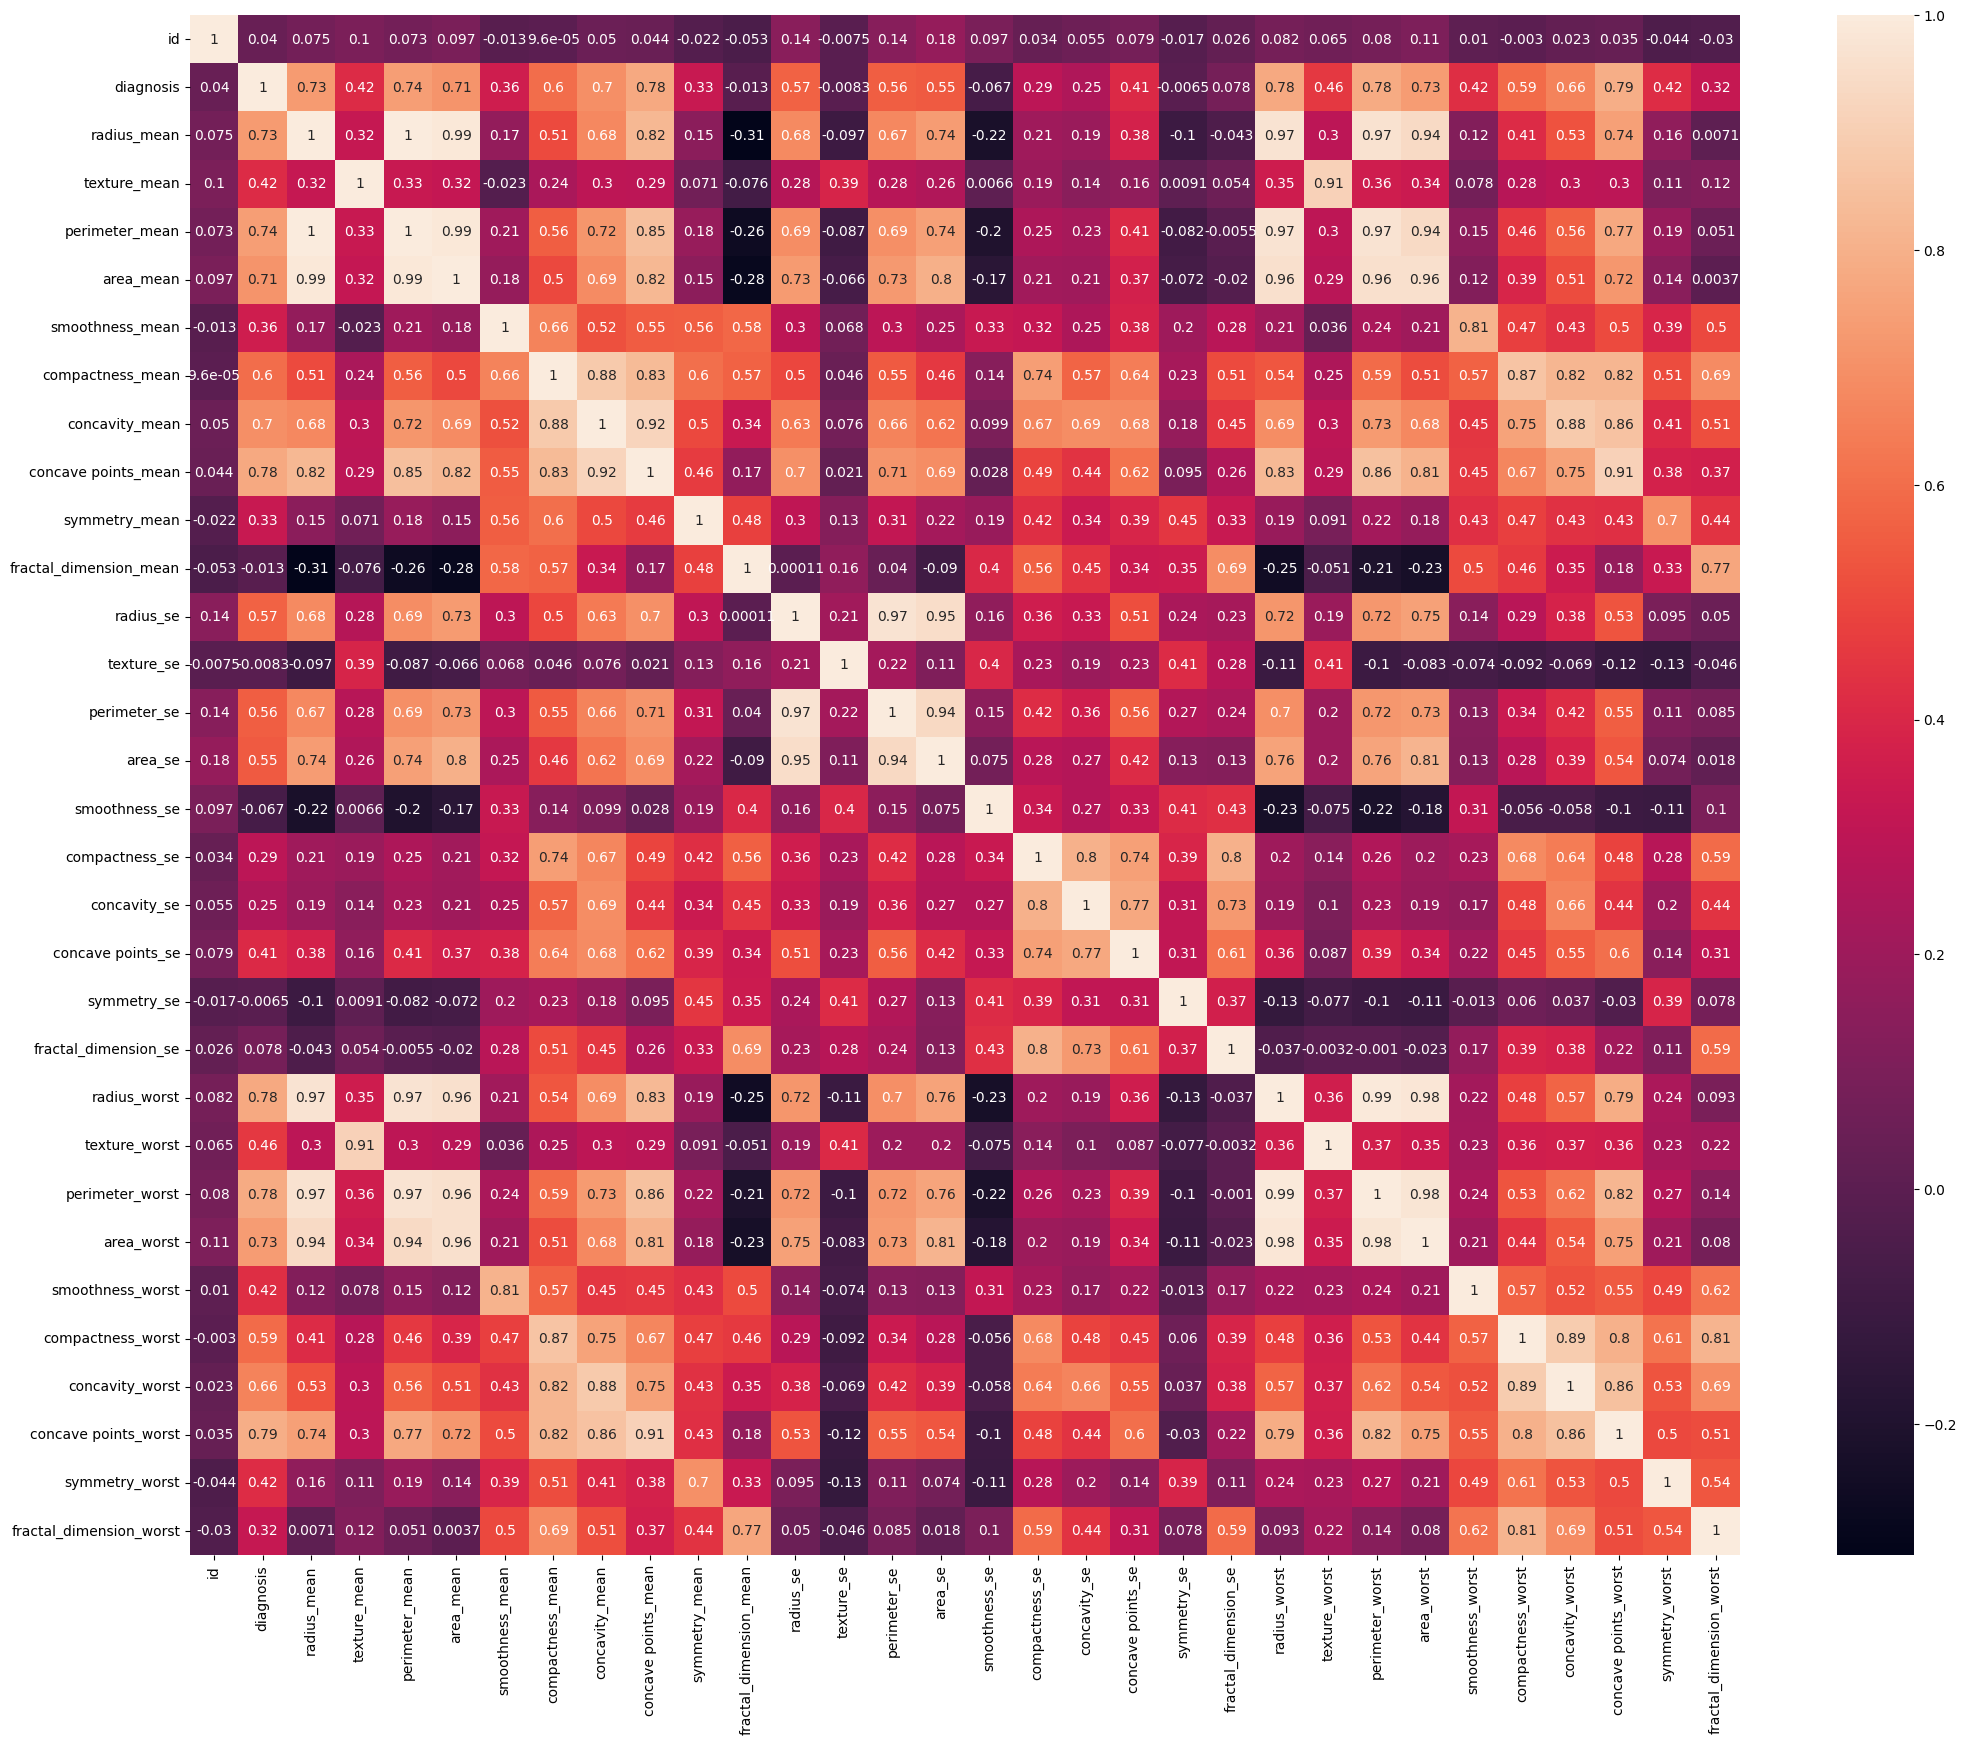

In [ ]:
# Create correlation to see if any columns are irrelevant

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(method='pearson'), annot=True);



From the above heatmap, it can be seen that the column 'id' is:

1.   **Uninformative:** The 'id' column contains a unique identifier for each observation, but this information is not useful for analyzing the characteristics of the observations themselves. It **does not provide any information about the diagnosis of breast cancer** or any of the features that might be related to breast cancer.

Hence, to further justify the uninformativeness of column 'id', below will be showing the pearson value of each independent variable to the targeted variable



In [ ]:
# Calculate Pearson correlation coefficients
correlations = df.corr()['diagnosis'].drop('diagnosis')

# Print the results
print(correlations)

id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [ ]:
print(correlations>0.5)

id                         False
radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                   True
texture_se                 False
perimeter_se                True
area_se                     True
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fractal_di

In [ ]:
# Further analyse the pearson value of column 'id' and 'diagnosis' as the column 'id' is not necessary for this classification project
# Calculate Pearson correlation coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(df['id'], df['diagnosis'])
print('Pearson correlation coefficient between id and diagnosis:', corr)


Pearson correlation coefficient between id and diagnosis: 0.039768509621717026


In [ ]:
# Hence, column 'ID' will also be dropped as it has only pearson value of 0.03 with column 'diagnosis', while also being the least correlated among other variables as shown above heatmap
df = df.drop(['id'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Check overall for data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# **Data Preprocessing**
Here, we convert raw data into a tidy dataset in order to enhance model performance,  improve data quality and enable effective analysis. This involves identifying and handling missing data, noisy data, and other inconsistencies in the dataset before feeding it into an algorithm for further analysis.

### **Data Cleaning**


**Standard and Non Standard Missing Values**

Standard missing values are values that are intentionally left blank or null, usually because the data was not collected or is not available.
Whereas non-standard missing values are values that are not recognized as missing values by software or algorithms such as data entry errors, encoding problems and data format issues.

In [ ]:
# Handling standard missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Since there are no standard blank missing values for pandas function to detect,
# we will need to identify the number of non standard blank missing values in this dataframe
# Identify the non standard missing value of '?' in each column by descending order
print("Number of non standard '?' missing value in the dataset: ")
df_replaced = df.replace(['?', '!'], np.NaN)
df_replaced.head(15)
print(df_replaced.isna().sum().sort_values(ascending=False))

Number of non standard '?' missing value in the dataset: 
diagnosis                  0
compactness_se             0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
smoothness_se              0
radius_mean                0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
fractal_dimension_worst    0
dtype: int64


**Duplicated Values**

In [ ]:
# Show true if there are duplicated values, False if there are none
print('Are there any duplicated values in this dataset?', df.duplicated().any())

# Total number of duplicated values
print('Number of total duplicated records in this dataset:', df.duplicated().sum())

# To check number of duplicated values compared with non-duplicated values
print('Number of non-duplicated records in this dataset:', len(df) - df.duplicated().sum())

# Show information about the dataframe
df.info()


Are there any duplicated values in this dataset? False
Number of total duplicated records in this dataset: 0
Number of non-duplicated records in this dataset: 569
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                

###**Imbalance Data Manipulation**

**Resampling Diagnosis Variable**

Balance of target variable:
Benign (B:0): 357
Malignant (M:1): 212




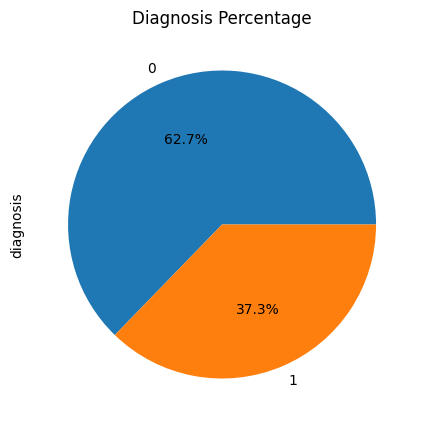

In [ ]:
# Print balance of the target variable
print("Balance of target variable:")
# From the above, benign and malignant had been mapped into class 0 and 1, to show the balance of the target variable B and M, below will be showing the counts of Benign and Malignant from class 0 and 1
print("Benign (B:0):", class_counts[0])
print("Malignant (M:1):", class_counts[1])
print("\n")
# Plot the diagnosis in a pie chart with percentage labels
plt.figure(figsize=(5,5))
class_counts.plot.pie(autopct='%.1f%%')
plt.title('Diagnosis Percentage')
plt.show()

1    357
0    357
Name: diagnosis, dtype: int64


<Axes: ylabel='diagnosis'>

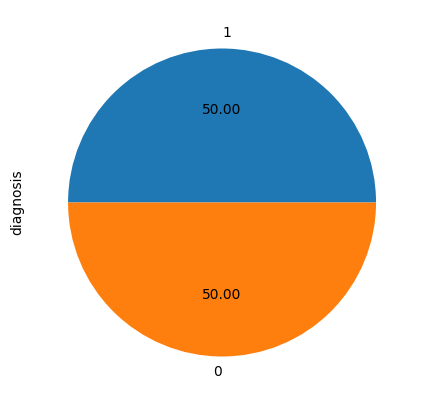

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[(df['diagnosis']==0)]
df_minority = df[(df['diagnosis']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # generates new samples from the existing minority samples with replacement
                                 n_samples= 357,   # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

# assign all attributes excluding the diagnosis attribute to the variable x.
x = df_upsampled.drop(["diagnosis"], axis=1)

# assign the diagnosis attribute to the variable y.
y = df_upsampled["diagnosis"]

# print the values of the two classes under the diagnosis column
print(y.value_counts())

# plot a pie chart for the diagnosis column
plt.figure(figsize=(5,5))
y.value_counts().plot.pie(autopct="%.2f")

### **Exploratory Data Analysis (EDA)**


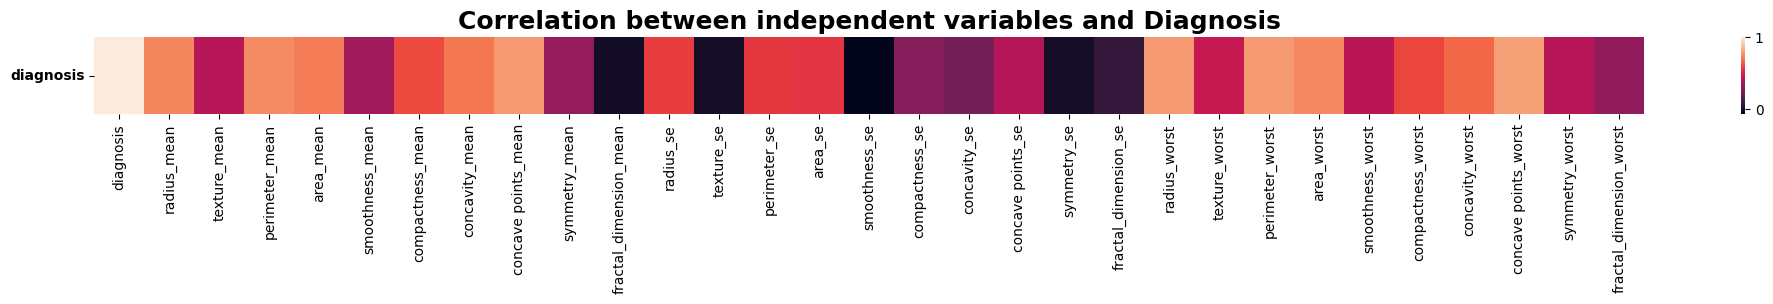

In [ ]:
# Find out the highest correlation with diagnosis
independent_variables = df.select_dtypes(exclude="object")
numeric_corr = independent_variables.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["diagnosis"], ascending=False).head(1))
plt.title("Correlation between independent variables and Diagnosis", weight="bold", fontsize=18)
plt.yticks(weight="bold", rotation=0)

plt.show()

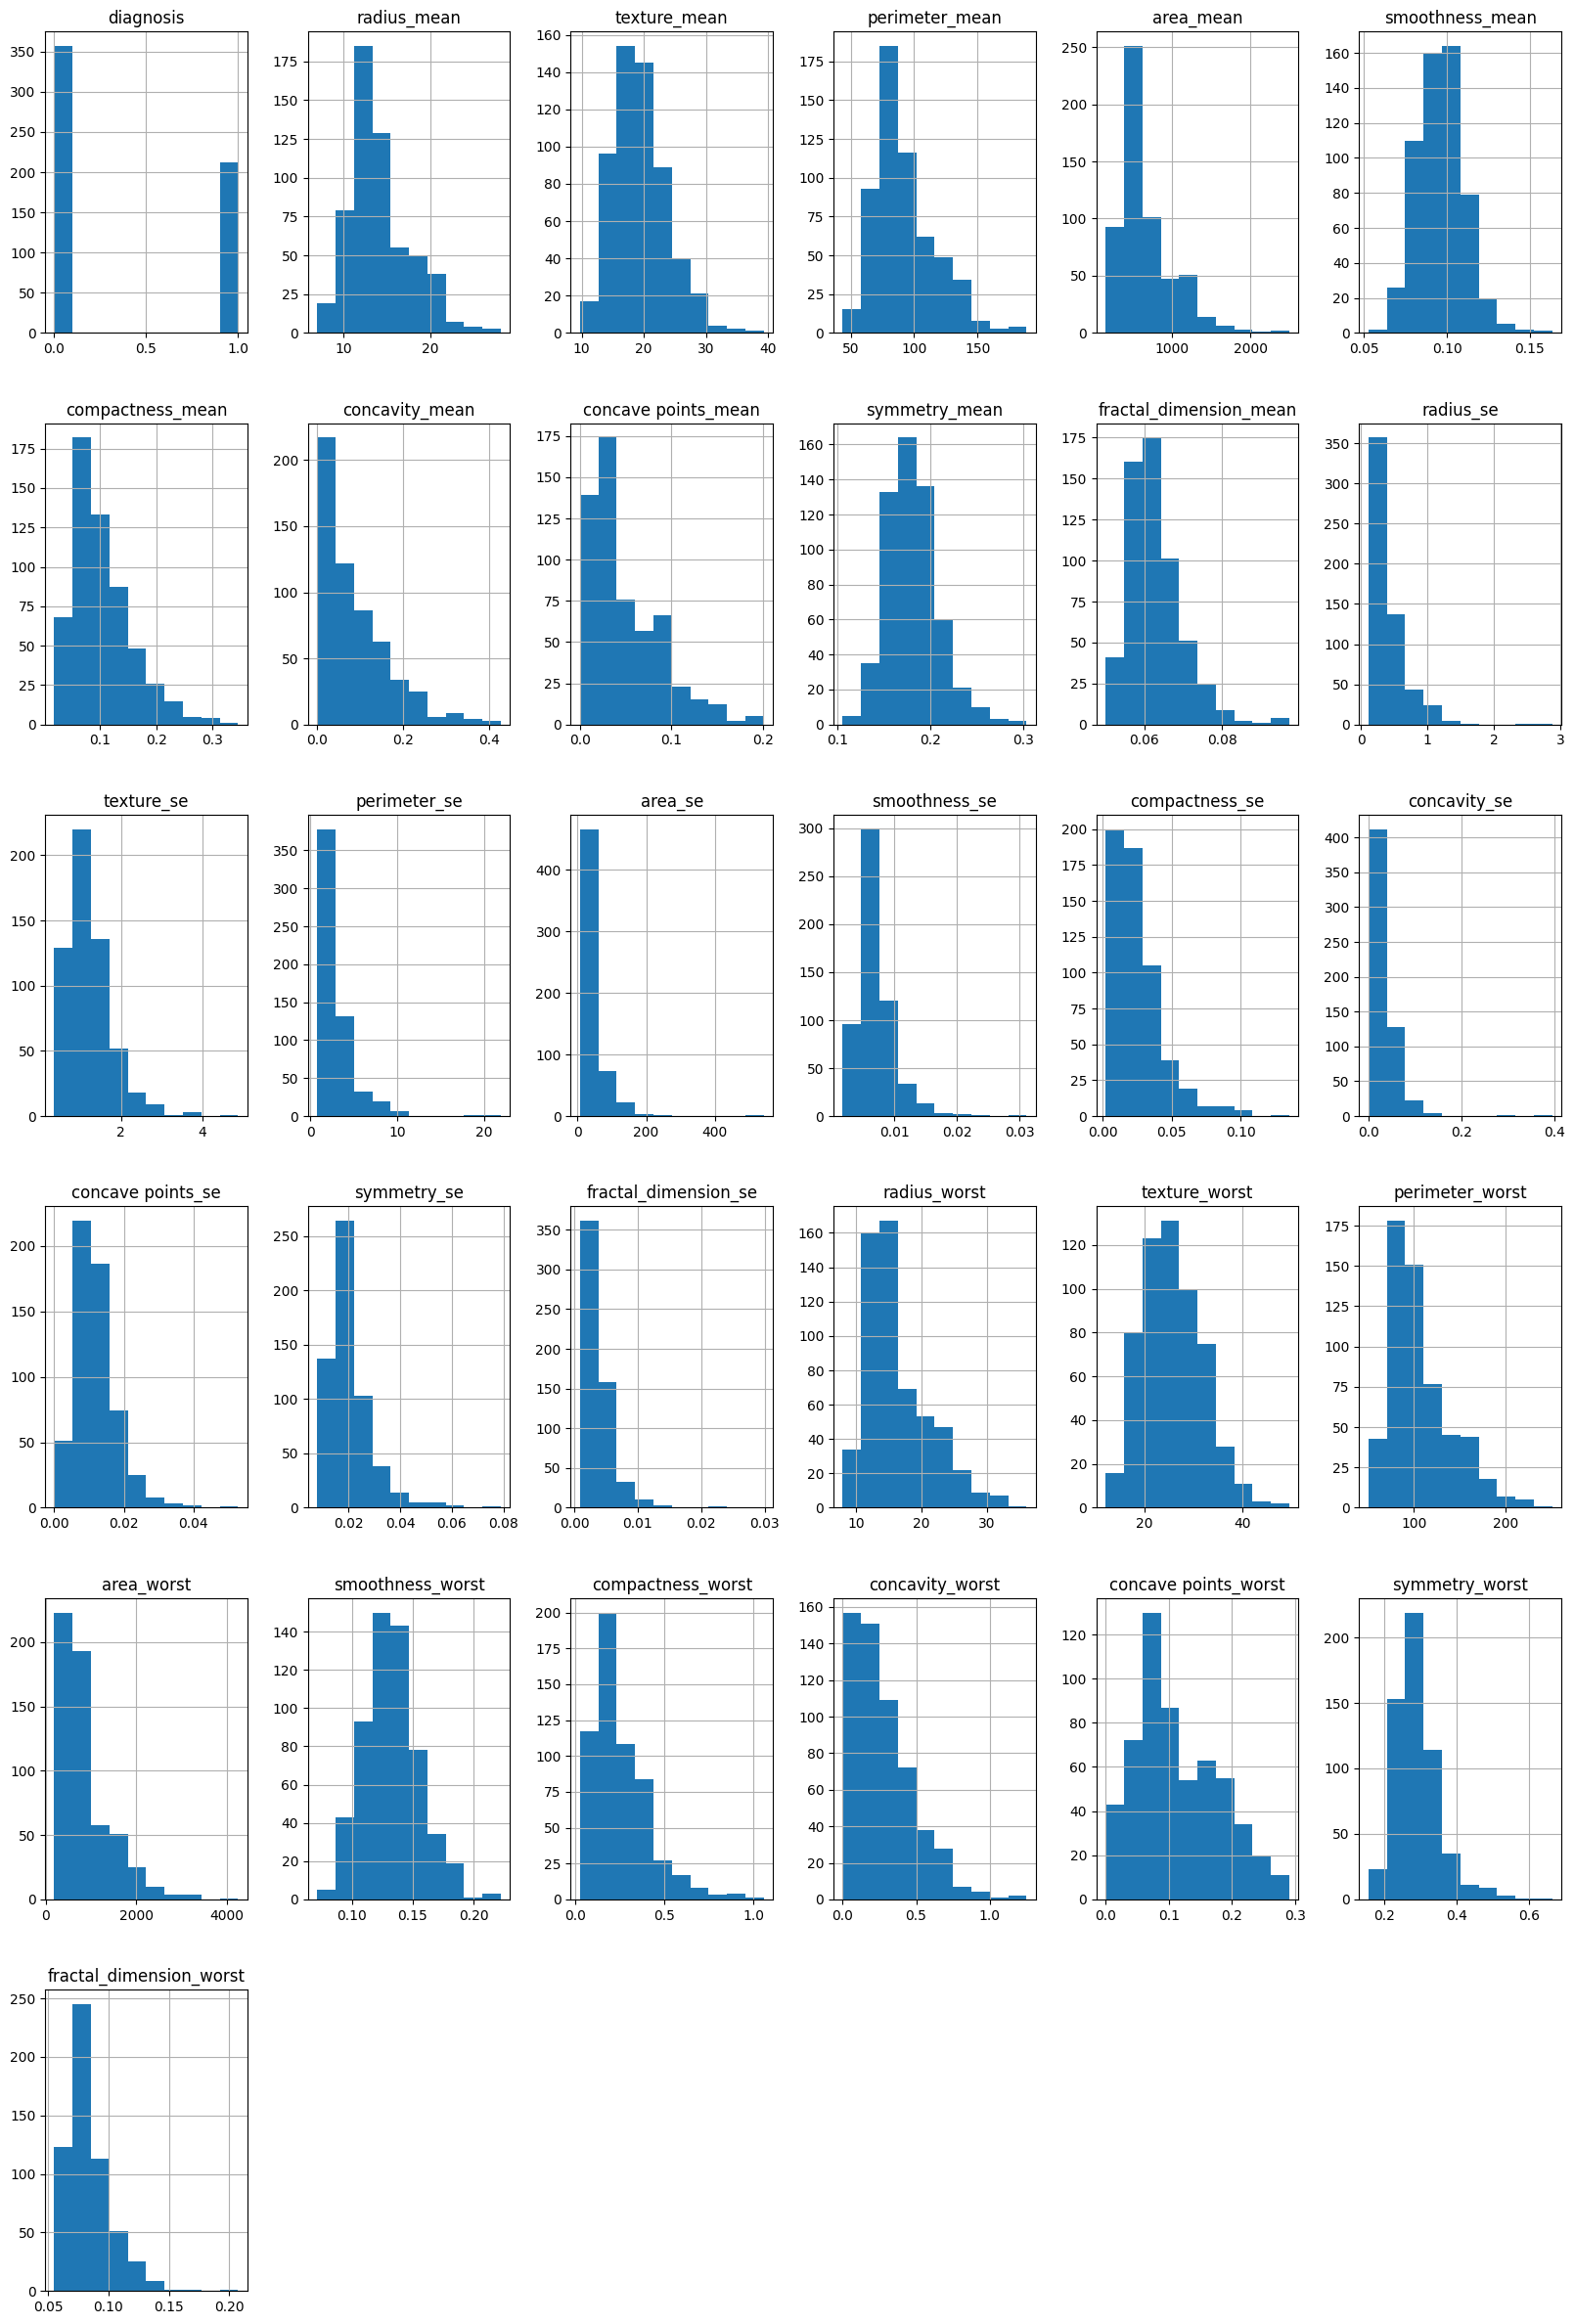

In [ ]:
data_hist_plot = df.hist(figsize = (20,30))

From the histogram plot above showing each independent variable, it can be seen that majority of the independent variable above are skewed to the right

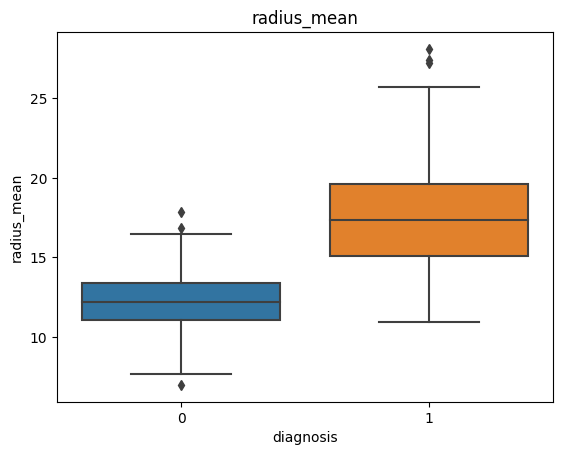

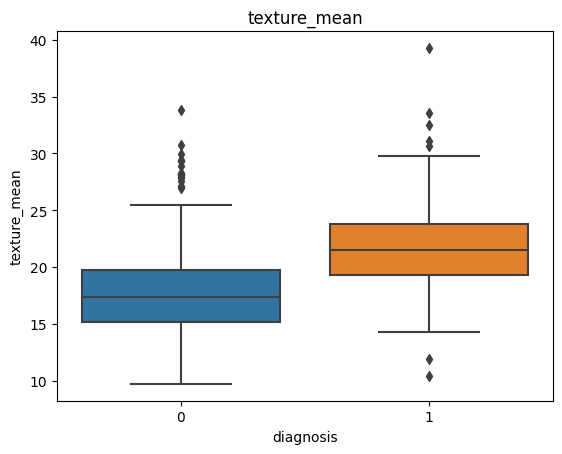

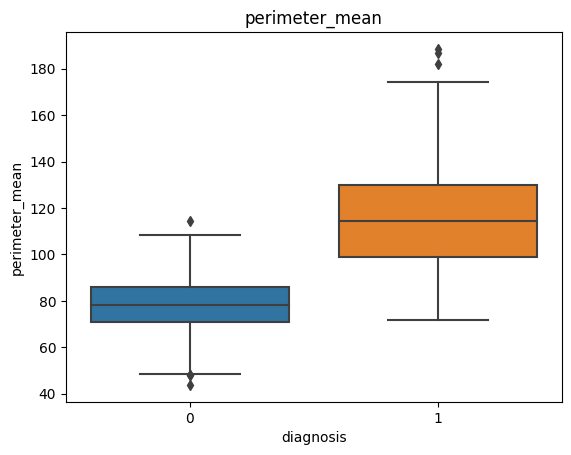

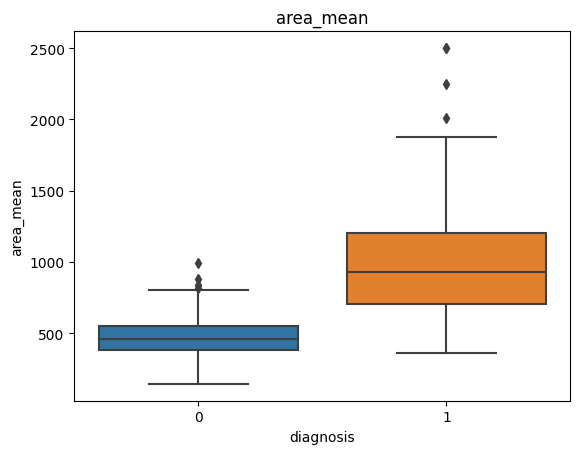

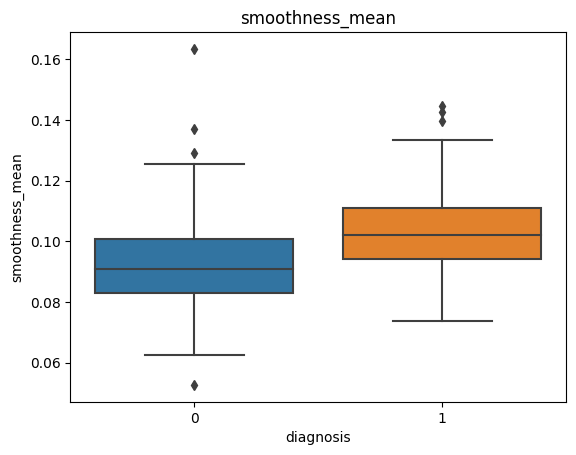

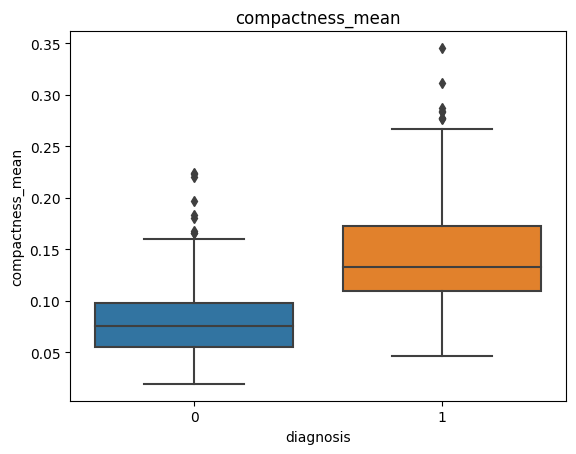

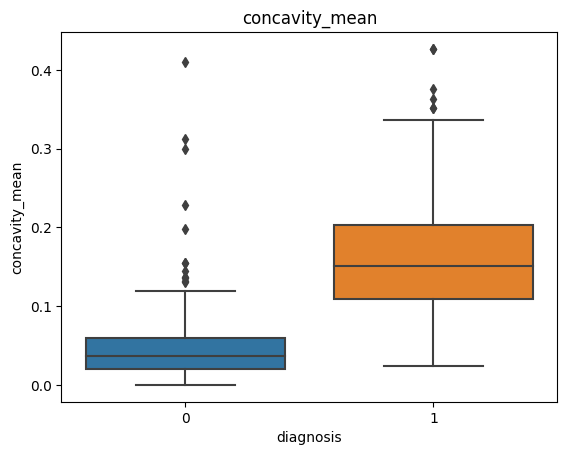

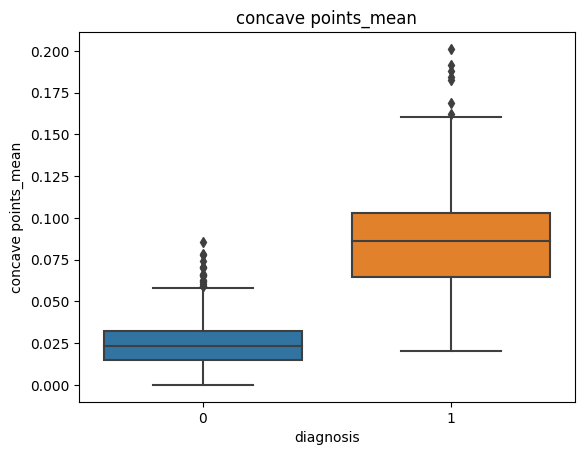

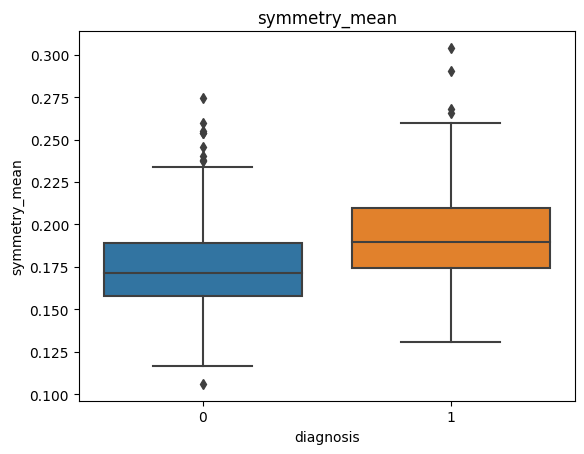

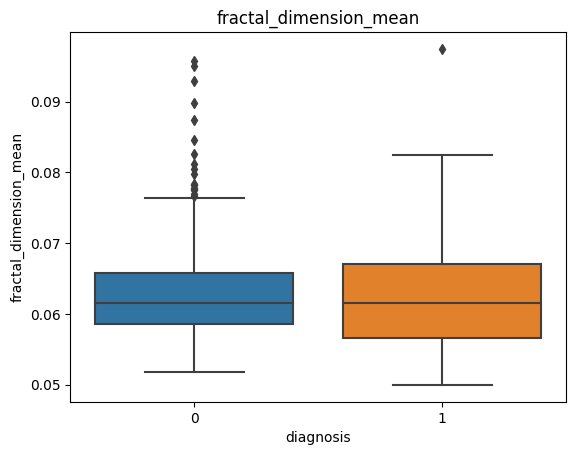

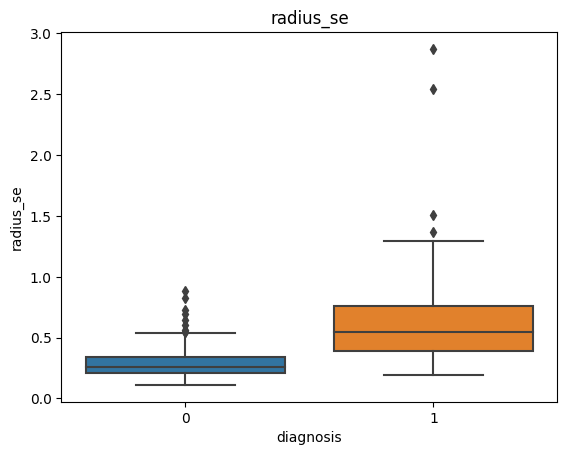

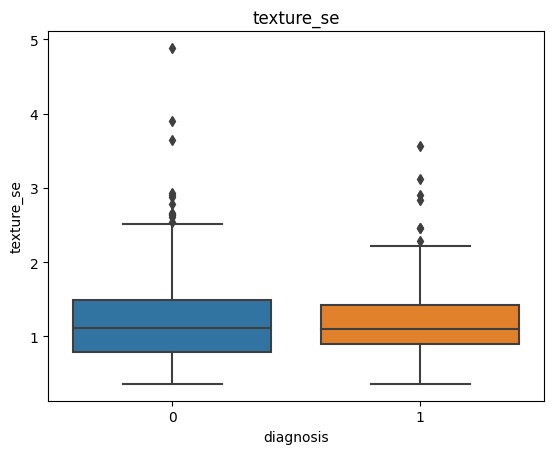

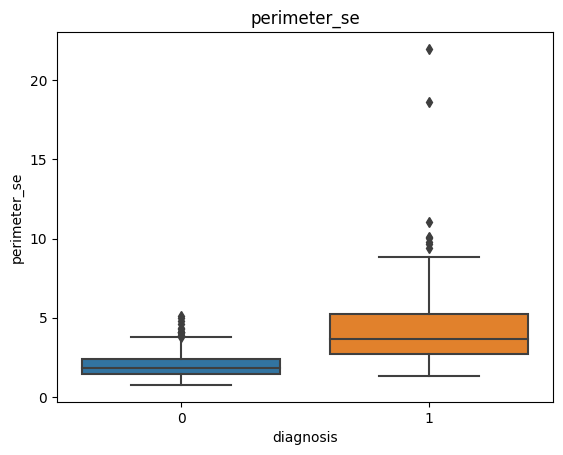

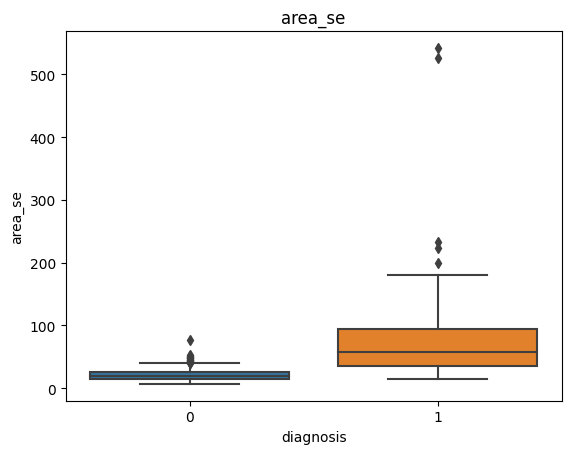

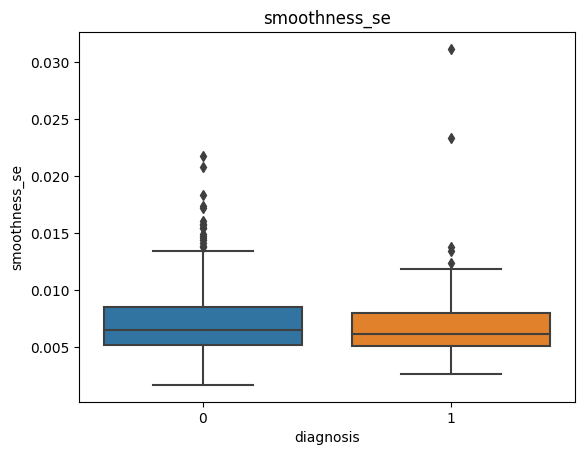

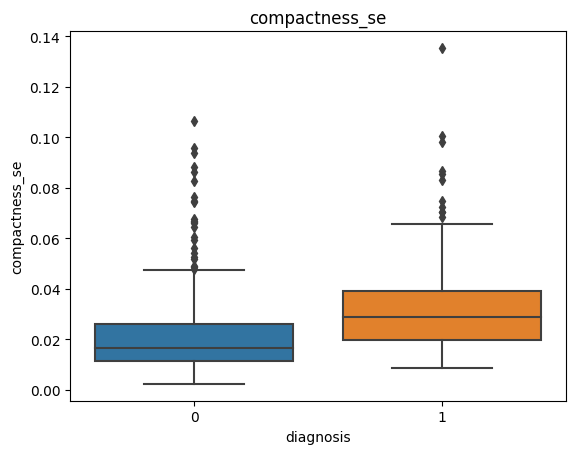

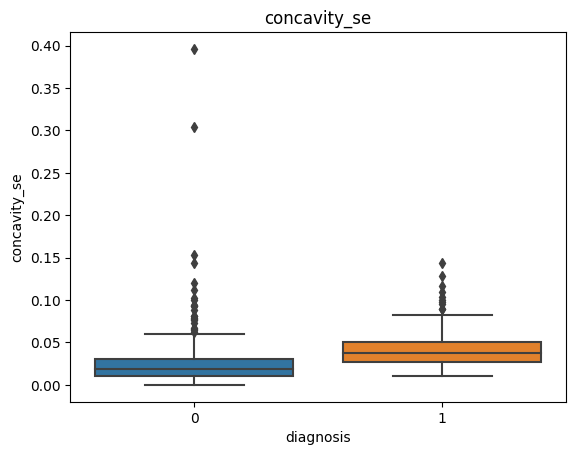

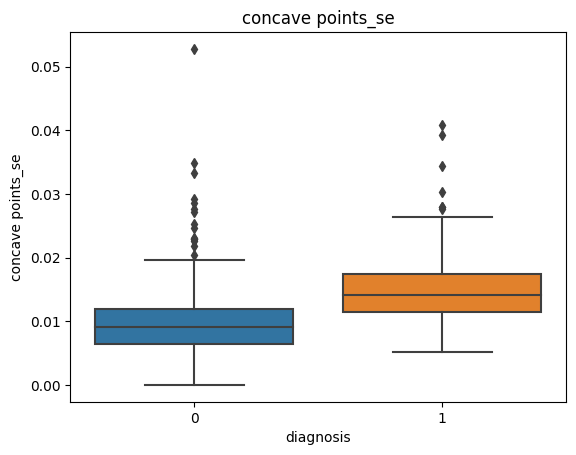

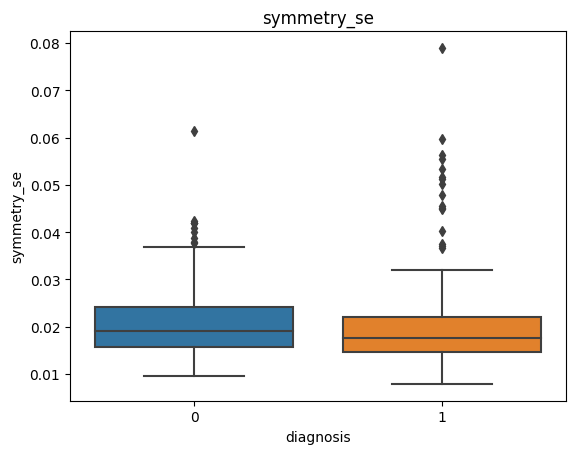

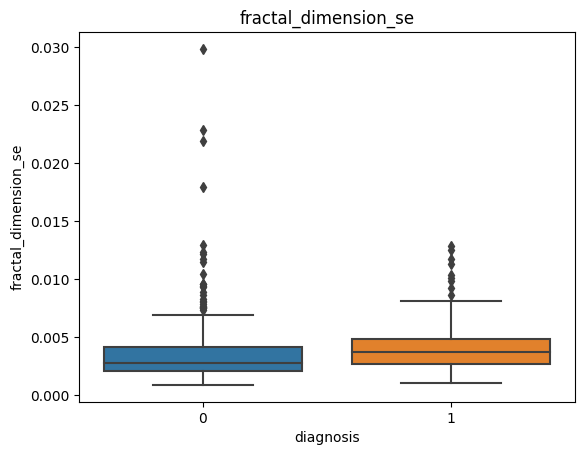

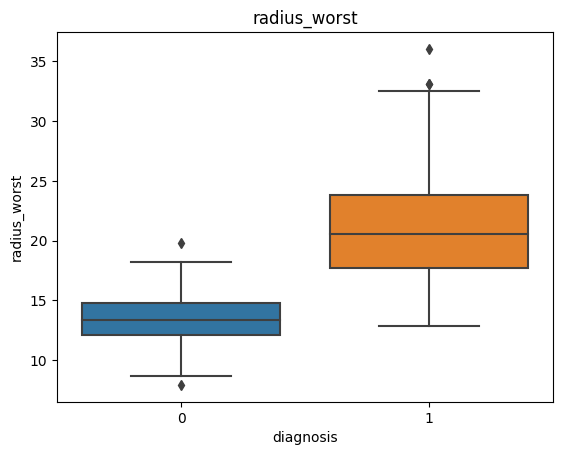

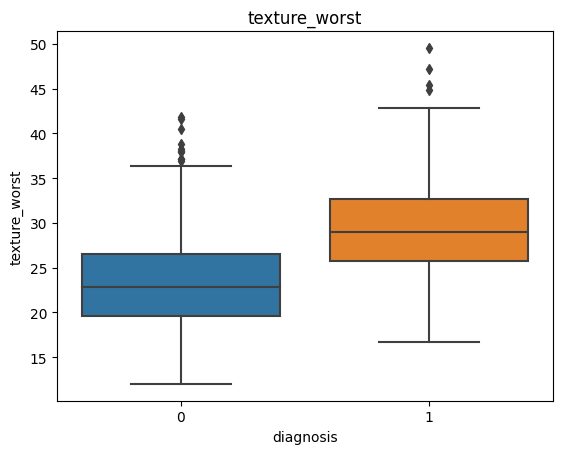

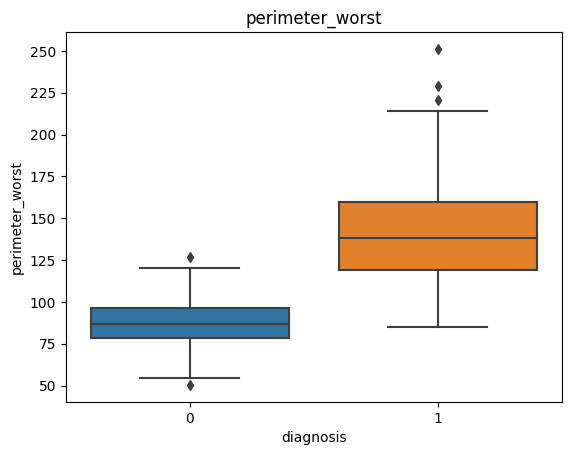

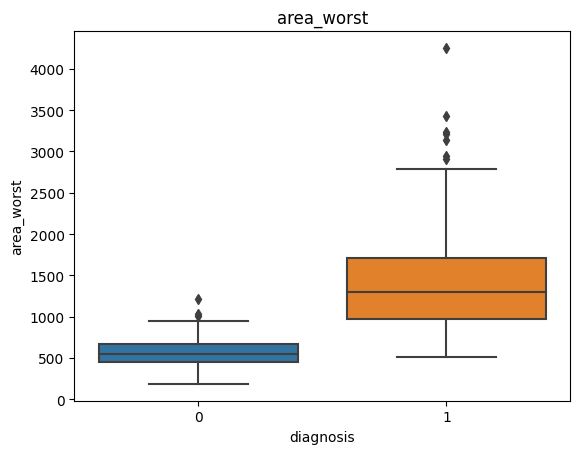

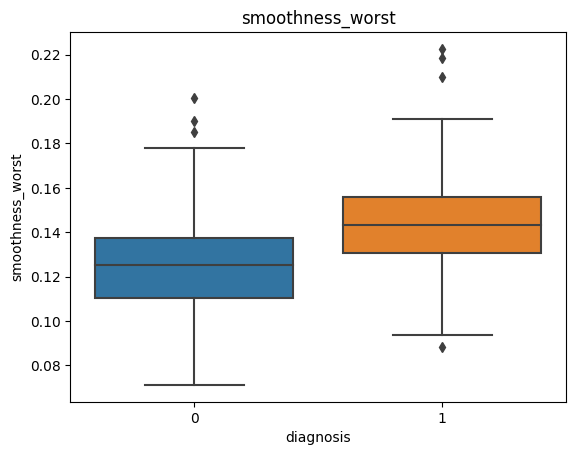

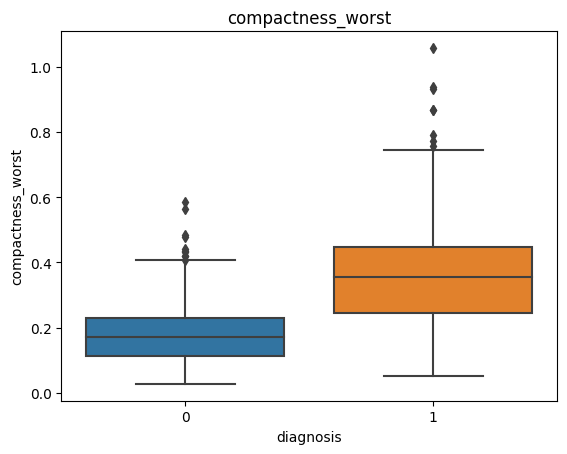

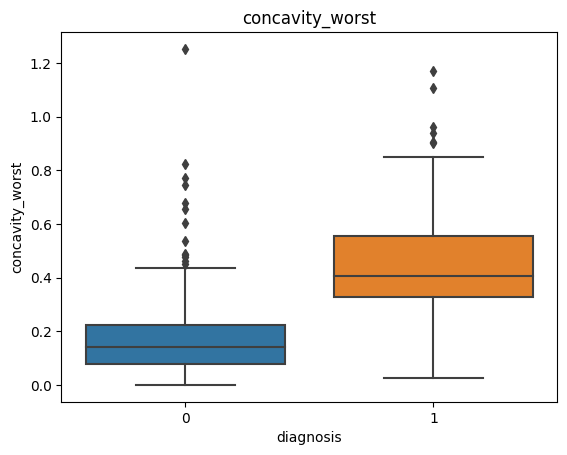

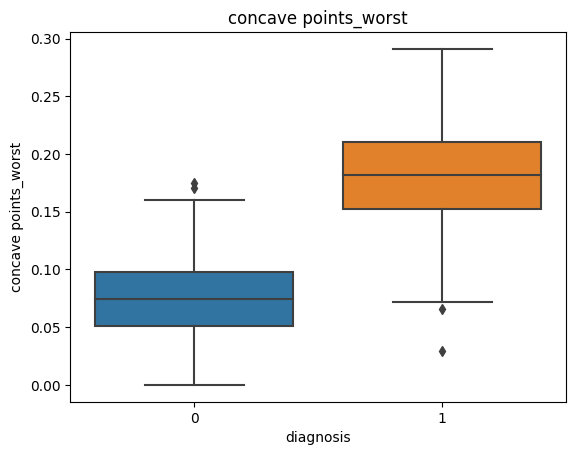

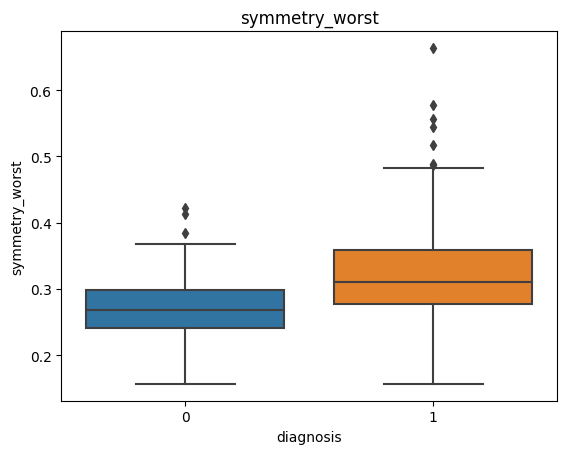

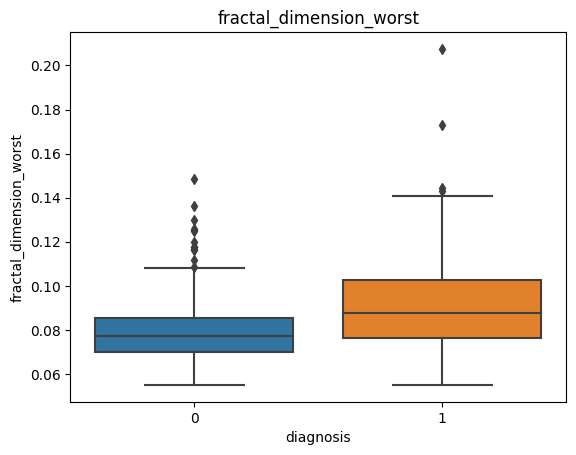

In [ ]:
# Create box plots of cleaned dataset
for column_name in df.columns:
    if column_name != 'diagnosis':
        sns.boxplot(x='diagnosis', y=column_name, data=df)
        plt.title(column_name)
        plt.show()

### **Feature Engineering**
This step leverages data to create new variables that are not in the training set with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

**Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
train_df, test_df = train_test_split(df_upsampled, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

print("\nRatio of train test validation set after splitting:")
train_ratio = train_df.shape[0] / df_upsampled.shape[0]
test_ratio = test_df.shape[0] / df_upsampled.shape[0]
val_ratio = val_df.shape[0] / df_upsampled.shape[0]

print(f"Train ratio: {train_ratio:.2f}")
print(f"Test ratio: {test_ratio:.2f}")
print(f"Validation ratio: {val_ratio:.2f}")



Training set shape: (456, 31)
Validation set shape: (115, 31)
Test set shape: (143, 31)

Ratio of train test validation set after splitting:
Train ratio: 0.64
Test ratio: 0.20
Validation ratio: 0.16


**Feature Normalization**

In [ ]:
# Separate the features and target variables
from sklearn.preprocessing import MinMaxScaler

X_train = train_df.drop('diagnosis', axis=1)
y_train = train_df['diagnosis']
X_val = val_df.drop('diagnosis', axis=1)
y_val = val_df['diagnosis']
X_test = test_df.drop('diagnosis', axis=1)
y_test = test_df['diagnosis']

# Create a MinMaxScaler object
scaler = MinMaxScaler()


# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Feature Selection**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

#Fit the random forest classifier to the training data
rfc.fit(X_train_scaled, y_train)

#Use the trained random forest classifier to select important features
sfm = SelectFromModel(rfc, prefit=False)

#Fit the feature selector on the training data
sfm.fit(X_train_scaled, y_train)

#Get the selected feature names
selected_features = X_train.columns[sfm.get_support()]


# Transform the training, validation, and test data using the selected features
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)
X_val_selected = sfm.transform(X_val_scaled)

# Print the number of selected features and the names of the selected features
print("Number of selected features:", len(selected_features))
print("Selected features:", selected_features)

Number of selected features: 8
Selected features: Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


# **Machine Learning Modeling**

**Hyperparameter Tuning**

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. The combination of hyperparameters maximizes the model’s performance, minimizing a predefined loss function to produce better results with fewer errors.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define a list of candidate models
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    MLPClassifier(random_state=42),
    SVC(random_state=42),
    GaussianNB()
]

# Define hyperparameters for each model
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

dt_params = {
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

mlp_params = {
    'hidden_layer_sizes': [(10, 5), (20, 10), (30, 15)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [200, 500, 1000]
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

nb_params = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}

# Define an empty list to store the best models and scores
best_models = []
best_scores = []


# Loop over each model and its corresponding hyperparameters
for i, (model, params) in enumerate(zip(models, [log_reg_params, knn_params, dt_params, mlp_params, svm_params, nb_params])):
    print(f"\n")
    print(f"Model {i+1}: {model.__class__.__name__}")
    print(f"Hyperparameters: {params}")
    print(f".\n.\nPerforming GridSearchCV...")



    # Fit the model using GridSearchCV
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X_train_selected, y_train)
    best_models.append(grid.best_estimator_)
    best_scores.append(grid.best_score_)

    # Output the best hyperparameters and score
    print(f".\n.\nBest Hyperparameters: {grid.best_params_}")
    print(f"Best Accuracy Score: {grid.best_score_:.4f}")

    # Evaluate the model on the validation set
    y_val_pred = grid.predict(X_val_selected)
    val_score = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy Score: {val_score:.4f}\n")

# Output the best model and its score
best_model = best_models[np.argmax(best_scores)]
best_score = np.max(best_scores)

print("Best Performing Model From Hyperparameter Tuning on Validation Set:")
print(f"The best model is: {best_model}\n")
print(f"The best performing model accuracy score: {best_score:.2f}")





Model 1: LogisticRegression
Hyperparameters: {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
.
.
Performing GridSearchCV...
.
.
Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Best Accuracy Score: 0.9496
Validation Accuracy Score: 0.9217



Model 2: KNeighborsClassifier
Hyperparameters: {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
.
.
Performing GridSearchCV...
.
.
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy Score: 0.9584
Validation Accuracy Score: 0.9304



Model 3: DecisionTreeClassifier
Hyperparameters: {'max_depth': [3, 5, 7, 9], 'criterion': ['gini', 'entropy']}
.
.
Performing GridSearchCV...
.
.
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7}
Best Accuracy Score: 0.9517
Validation Accuracy Score: 0.9391



Model 4: MLPClassifier
Hyperparameters: {'hidden_layer_sizes': [(10, 5), (20, 10), (30, 15)], 'activation': ['relu', 'tanh', 'lo

### **Model Training: Logistic Regression, KNeighbors Classifier, Decision Tree & MLP Classifier**


In [ ]:
# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Artificial Neural Network Algorithm
from sklearn.neural_network import MLPClassifier

# Define a list of candidate models with best hyperparameters from tuning
models = [
   # Logistic Regression with L2 regularization and C=100
    LogisticRegression(penalty='l2', C=100, random_state=42),

    # k-Nearest Neighbors classifier with k=3, distance metric='manhattan'
    KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan'),

    # Decision Tree classifier with entropy criterion and max depth=9
    DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42),

    # Multi-Layer Perceptron with 2 hidden layers of 10 and 5 neurons and alpha=0.1
    MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, alpha=0.1, solver='lbfgs', random_state=42)
]



# **Model Evaluation**

### **Accuracy Scores: Train, Validation, Test Sets**








In [ ]:
from sklearn.metrics import accuracy_score

# Train and evaluate each model
for model in models:
    model.fit(X_train_selected, y_train)

    # Compute the accuracy scores using the selected features
    y_pred_train = model.predict(X_train_selected)
    y_pred_val = model.predict(X_val_selected)
    y_pred_test = model.predict(X_test_selected)

    print(type(model).__name__)
    print("---------")
    print("Training set accuracy:", accuracy_score(y_train, y_pred_train))
    print("Validation set accuracy:", accuracy_score(y_val, y_pred_val))
    print("Test set accuracy:", accuracy_score(y_test, y_pred_test))
    print()

LogisticRegression
---------
Training set accuracy: 0.9583333333333334
Validation set accuracy: 0.9217391304347826
Test set accuracy: 0.951048951048951

KNeighborsClassifier
---------
Training set accuracy: 1.0
Validation set accuracy: 0.9304347826086956
Test set accuracy: 0.986013986013986

DecisionTreeClassifier
---------
Training set accuracy: 1.0
Validation set accuracy: 0.9391304347826087
Test set accuracy: 0.965034965034965

MLPClassifier
---------
Training set accuracy: 0.9671052631578947
Validation set accuracy: 0.9304347826086956
Test set accuracy: 0.965034965034965



### **Classification Report: Precision, Recall, F1 Score, Support**

In [ ]:
from sklearn.metrics import classification_report
# Train and evaluate each model
for model in models:
    model.fit(X_train_selected, y_train)

    # Compute the predicted labels for each dataset
    y_pred_train = model.predict(X_train_selected)
    y_pred_val = model.predict(X_val_selected)
    y_pred_test = model.predict(X_test_selected)

    # Define the class labels
    class_labels = ['Class Benign', 'Class Malignant']

    # Compute and print classification report
    print(f"\nClassification Report of Test Set ({type(model).__name__})")
    print(classification_report(y_test, y_pred_test, target_names=class_labels))
    print("---------------------------------------------------------\n")


Classification Report of Test Set (LogisticRegression)
                 precision    recall  f1-score   support

   Class Benign       0.92      0.97      0.94        62
Class Malignant       0.97      0.94      0.96        81

       accuracy                           0.95       143
      macro avg       0.95      0.95      0.95       143
   weighted avg       0.95      0.95      0.95       143

---------------------------------------------------------


Classification Report of Test Set (KNeighborsClassifier)
                 precision    recall  f1-score   support

   Class Benign       0.98      0.98      0.98        62
Class Malignant       0.99      0.99      0.99        81

       accuracy                           0.99       143
      macro avg       0.99      0.99      0.99       143
   weighted avg       0.99      0.99      0.99       143

---------------------------------------------------------


Classification Report of Test Set (DecisionTreeClassifier)
                 p

### **Confusion Matrix**

[0 1]


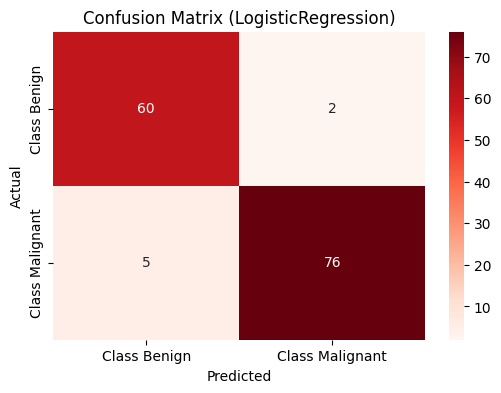

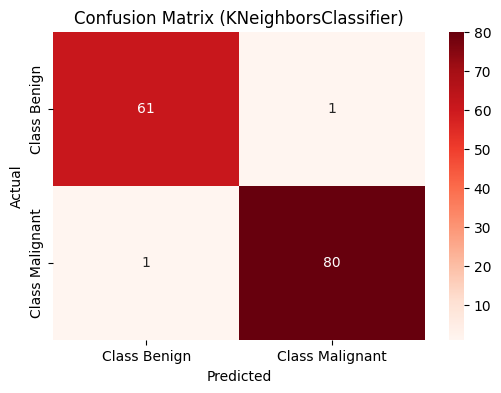

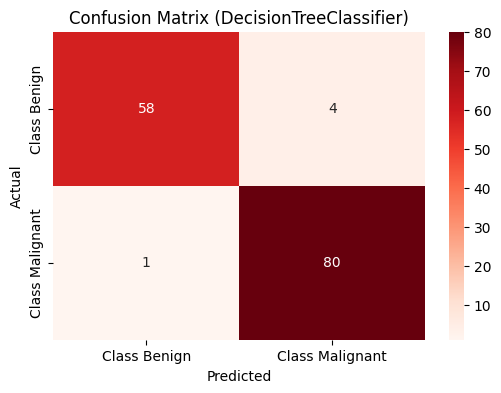

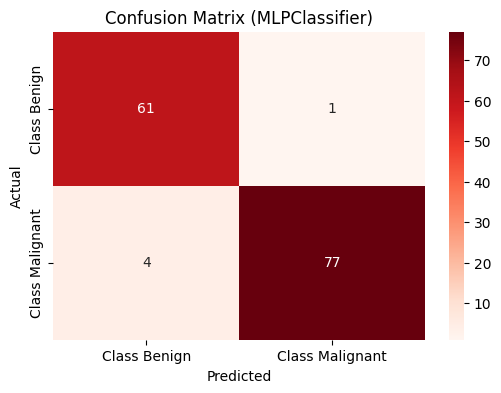

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

unique_labels = np.unique(y)
print(unique_labels)

# Train and evaluate each model
for model in models:
    model.fit(X_train_selected, y_train)

    # Compute the predicted labels for each dataset
    y_pred_train = model.predict(X_train_selected)
    y_pred_val = model.predict(X_val_selected)
    y_pred_test = model.predict(X_test_selected)

    # Define the class labels
    class_labels = ['Class Benign', 'Class Malignant']


    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({type(model).__name__})')
    plt.show()






### **ROC & AUC Curve**

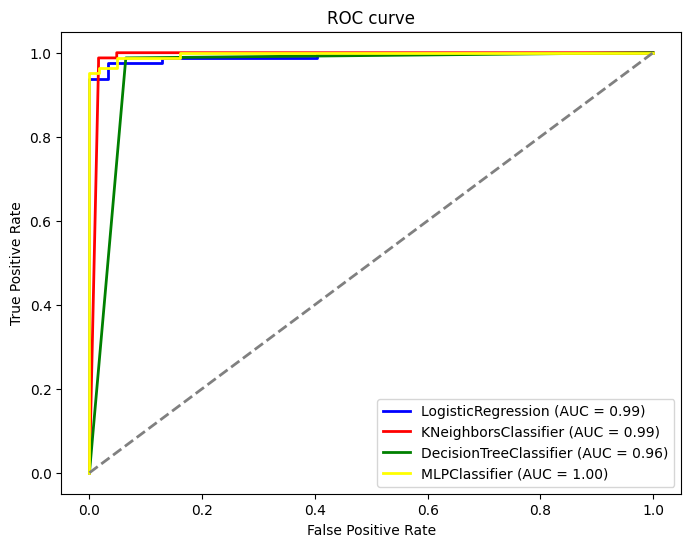

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# Define colors and line styles for each model
colors = ['blue', 'red', 'green', 'yellow']
linestyles = ['-', '-', '-', '-']

# Loop through each model and plot its ROC curve and AUC score
for i, model in enumerate(models):
    model.fit(X_train_selected, y_train)
    y_pred_test = model.predict_proba(X_test_selected)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], linestyle=linestyles[i],
             lw=2, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

# Plot the reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Add legend, axis labels, and title
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# Show the plot
plt.show()




## **Model Selection**

**K-fold Cross Validation**

The Cross Validation Mean Score of Each Model Implemented:
-------------------------------
LogisticRegression: 0.9519 +/- 0.0233
KNeighborsClassifier: 0.9518 +/- 0.0348
DecisionTreeClassifier: 0.9429 +/- 0.0314
MLPClassifier: 0.9629 +/- 0.0276

---------------------------------------------------------------------------
Final Evaluation of The Best Model's Performance Based on Cross Validation:
---------------------------------------------------------------------------
Model Name: MLPClassifier
Cross Validation Mean Score of The Best Model: 0.9629
Test Set Accuracy of Selected Model: 0.9650


              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96        62
   Malignant       0.99      0.95      0.97        81

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

--------------------------------------------------------------------------

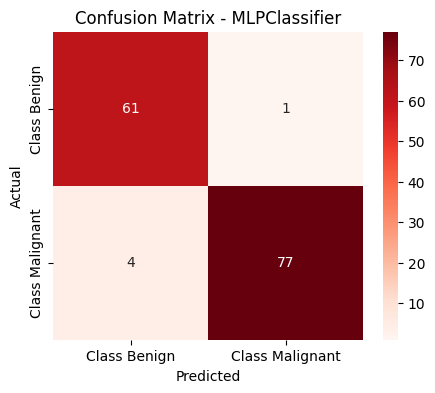

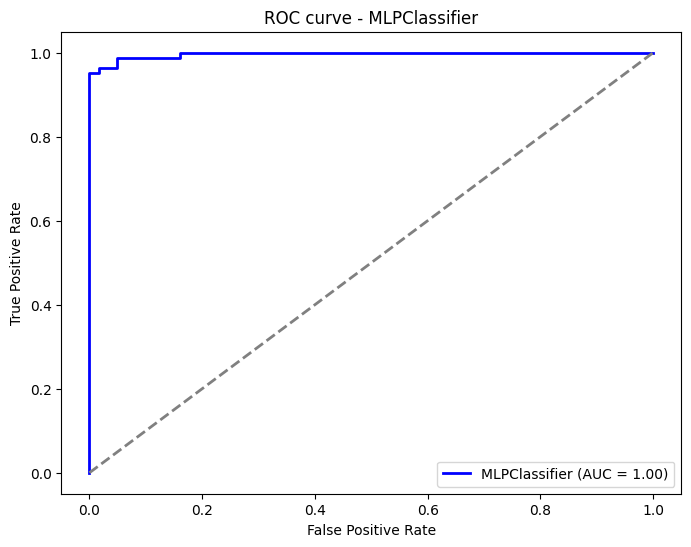

In [ ]:
# Train each model on the training set using cross-validation
from sklearn.model_selection import cross_val_score
n_folds = 10

best_score = None
best_model = None

# Define a list of candidate models with best hyperparameters
models = [
   # Logistic Regression with L2 regularization and C=100
    LogisticRegression(penalty='l2', C=100, random_state=42),

    # k-Nearest Neighbors classifier with k=3, distance metric='manhattan'
    KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan'),

    # Decision Tree classifier with entropy criterion and max depth=9
    DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42),

    # Multi-Layer Perceptron with 2 hidden layers of 10 and 5 neurons and alpha=0.1
    MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, alpha=0.1, solver='lbfgs', random_state=42)
]



# Evaluate the performance of each model using cross-validation
print("The Cross Validation Mean Score of Each Model Implemented:")
print("-------------------------------")
for model in models:
    scores = cross_val_score(model, X_train_selected, y_train, cv=n_folds)
    print(f"{type(model).__name__}: {scores.mean():.4f} +/- {scores.std():.4f}")

    # Select the best-performing model based on the cross-validation scores
    if best_score is None or scores.mean() > best_score:
        best_score = scores.mean()
        best_model = model

print("\n---------------------------------------------------------------------------")
print("Final Evaluation of The Best Model's Performance Based on Cross Validation:")
print("---------------------------------------------------------------------------")
print(f"Model Name: {type(best_model).__name__}")
print(f"Cross Validation Mean Score of The Best Model: {best_score:.4f}")


# Train the best-performing model on the training set
best_model.fit(X_train_selected, y_train)

# Evaluate the best-performing model on the test set
y_pred = best_model.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ['Benign', 'Malignant']

# Compute the accuracy of the model on the test set
test_acc = np.trace(cm) / np.sum(cm)
print(f"Test Set Accuracy of Selected Model: {test_acc:.4f}")

# Define the class labels
class_labels = ['Actual Benign', 'Actual Malignant']

# Compute precision, recall, and F1 score for each class
from sklearn.metrics import classification_report
print("\n")
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=target_names))
print("--------------------------------------------------------------------------------------------------------\n")

# Plot the confusion matrix
# Define the class labels
class_labels = ['Class Benign', 'Class Malignant']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {type(best_model).__name__}')

plt.show()

# Plot the ROC curve and AUC score for the best-performing model
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'{type(best_model).__name__} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve - {type(best_model).__name__}')
plt.show()





